In [3]:
%matplotlib inline

In [14]:
import torch
import json
from collections import defaultdict

In [4]:
with open('./BioASQ-trainingDataset5b.txt', encoding='utf8') as f:
    data = json.load(f)

In [15]:
question_type = defaultdict(int)
for sample in data['questions']:
    question_type[sample['type']] += 1
question_type

defaultdict(int, {'factoid': 486, 'list': 413, 'summary': 400, 'yesno': 500})

## Exact answer case study

In [24]:
for sample in data['questions']:
    if sample['type'] == 'factoid':
        print (sample['exact_answer'])

['TH monocarboxylate transporter 8 (MCT8) mutation is implicated in the TH resistance syndrome']
[['Bazex syndrome']]
[['castration-resistant prostate cancer']]
[['glycosyltransferase 8 domain containing 1']]
[['plasma membrane']]
['autosomal recessive']
['autosomal dominant']
[['Hydrophilic Interaction Chromatography']]
[['All-alpha-helical fold']]
[['c-Jun NH2-terminal kinase', 'JNK']]
['TAILS: Terminal Amine Isotopic Labeling of Substrates']
[['EWS/FLI1']]
[['acute ischemic stroke']]
[['proprotein convertase subtilisin/kexin type 9']]
['S-adenosyl-L-methionine']
[['Hedghog signalling pathway']]
[['In Fanconi anemia cells, the S-phase checkpoint is inefficient.']]
[['aryl hydrocarbon receptor interacting protein']]
[['human telomerase reverse transcriptase']]
[['SCF(β-TrCP)', 'SCF beta-transducin repeat-containing protein (beta-TrCP)', 'beta-Trcp']]
['No crustal structure of Greek Goat Encephalitis found']
[['thyroid transcription factor 1']]
['Human Telomerase']
[['hormone receptor-

In [28]:
for sample in data['questions']:
    if sample['type'] == 'list':
        print (sample['exact_answer'])

[['epidermal growth factor'], ['betacellulin'], ['epiregulin'], ['heparin-binding epidermal growth factor'], ['transforming growth factor-α'], ['amphiregulin'], ['epigen']]
[['let-7a'], ['let-7b'], ['let-7i'], ['miR-21'], ['miR-26a'], ['miR-92'], ['miR-93'], ['miR-100'], ['miR-132'], ['miR-141'], ['miR-145'], ['miR-148a'], ['miR-152'], ['miR-182'], ['miR-200a'], ['miR-200b'], ['miR-200c'], ['miR-203'], ['miR-509-5p'], ['miR-510']]
[['neostigmine'], ['pyridostigmine']]
[['DVL-1'], ['DVL-2'], ['DVL-3']]
[['Class I: sodium channel blockers'], ['ClassII: beta blockers'], ['Class III: potassium channel blockers'], ['Class IV: calcium channel blockers']]
[['Notch-1'], ['Notch-2'], ['Notch-3'], ['Notch-4']]
[['altered morphology'], ['arrested cell-cycle progression'], ['development of aberrant gene expression with proinflammatory behavior'], ['telomere shortening']]
[['OCT4', 'Oct3/4', 'Pou5f1'], ['SOX2'], ['MYC', 'c-MYC'], ['KLF4']]
[['childhood Myocerebrohepatopathy Spectrum disorders (MCHS

## Exact answer in snippet checking

In [60]:
def getInSnippetRatio(q_type, data, answer_type='exact_answer'):
    poor_match = []
    in_snippet_lst = []
    for sample in data['questions']:
        if sample['type'] == q_type:
            answer_snippet = []
            for snippet in sample['snippets']:
                answer_snippet.append(snippet['text']) 
            answer_snippet = '\n'.join(answer_snippet)
            answer_lst = sample[answer_type]
            for answer in answer_lst:
                in_snippet = False
                if isinstance(answer, list):
                    for ans in answer:
                        if ans.lower() in answer_snippet.lower():
                            in_snippet = True
                else:
                    in_snippet = answer.lower() in answer_snippet.lower()
                if not in_snippet:
                    poor_match.append((sample['body'], answer_snippet, answer_lst))
                    break
            in_snippet_lst.append(in_snippet)
    print (sum(in_snippet_lst), len(in_snippet_lst), sum(in_snippet_lst)/len(in_snippet_lst))
    return poor_match

In [58]:
factoid_pmatch = getInSnippetRatio('factoid', data)
list_pmatch = getInSnippetRatio('list', data)

320 486 0.6584362139917695
216 413 0.5230024213075061


## Poor matches case study

In [59]:
factoid_pmatch[:5]

[('Which thyroid hormone transporter is implicated in thyroid hormone resistance syndrome?',
  'Hemizygous MCT8 mutations in males cause severe psychomotor retardation, known as the Allan-Herndon-Dudley syndrome (AHDS), and abnormal serum TH levels. AHDS thus represents a type of TH resistance caused by a defect in cellular TH transport.\n One of them, caused by mutations in the TH cell-membrane transporter MCT8, produces severe psychomotor defects.\n Three syndromes, in which resistance to hormone action is respectively due to mutations in the gene encoding for thyroid hormone receptor TRβ, impaired T4 and T3 transport, and impaired conversion of T4 to T3 mediated by deiodinases.\nOne, producing severe psychomotor defects in > 100 males from 26 families, is caused by mutations in the cell-membrane transporter of TH, MCT8;',
  ['TH monocarboxylate transporter 8 (MCT8) mutation is implicated in the TH resistance syndrome']),
 ('Which is the protein that is encoded by the gene GLT8D1?',


## Exact answer in snippet checking

In [61]:
factoid_pmatch = getInSnippetRatio('factoid', data, 'ideal_answer')
list_pmatch = getInSnippetRatio('list', data, 'ideal_answer')

170 486 0.3497942386831276
112 413 0.2711864406779661


In [ ]:
def explore(data):
    for sample in data['questions']:
        if sample['type'] not in ['factoid', 'list']:
            continue
        question = sample['body']
        answer = 

In [ ]:
def getQAPair(data):
    for sample in data['questions']:
        

In [11]:
len(data['questions'])

1799

In [2]:
train = [0.0178, 0.0178, 0.072, 0.177, 0.172, 0.238, 0.345, 0.419, 0.494, 0.567, 0.622, 0.645, 0.669, 0.687]
train_best_of_n = [0.061, 0.061, 0.156, 0.175, 0.189, 0.218, 0.279, 0.336, 0.364, 0.483, 0.554, 0.587, 0.635, 0.658]
dev = [0.014, 0.014, 0.0691, 0.103, 0.135, 0.184, 0.256, 0.296, 0.348, 0.360, 0.328, 0.291, 0.265, 0.253]
dev_best_of_n = [0.037, 0.037, 0.113, 0.094, 0.094, 0.132, 0.150, 0.188, 0.226, 0.245, 0.245, 0.226, 0.245, 0.264]
print (len(train), len(train_best_of_n), len(dev), len(dev_best_of_n))

14 14 14 14


In [6]:
import pandas as pd
df = pd.DataFrame({'train':train, 'train_best_of_n':train_best_of_n, 'dev':dev, 'dev_best_of_n':dev_best_of_n})

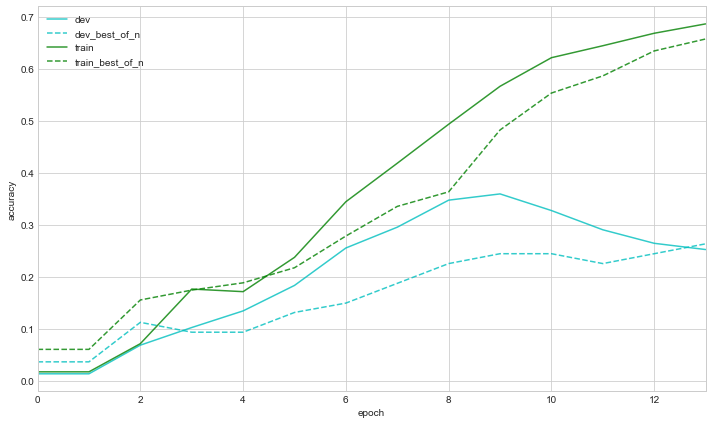

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

ax = df.plot(kind='line', style=['c-', 'c--', 'g-', 'g--'], figsize=(10, 6), alpha=0.8)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
fig = plt.gcf()
plt.tight_layout()
fig.savefig('trend', dpi=300)

In [37]:
import json
with open('./data/MSMarco_dev_v1.1.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

JSONDecodeError: Extra data: line 2 column 1 (char 2956)

In [19]:
import json
import random
import utils
random.seed(1)

In [20]:
def split(data):
    train = {'questions':[]}
    test = {'questions':[]}
    for q in data['questions']:
        if random.randint(1, 101) > 80:
            test['questions'].append(q)
        else:
            train['questions'].append(q)
    return train, test

In [21]:
data = json.load(open('./BioASQ-trainingDataset5b.txt', encoding='utf-8'))

In [22]:
train, test = split(data)

In [23]:
a = utils.get_qa_pair(train)
b = utils.get_qa_pair(test)

duplicate snippet count: 2944
questions count: 385
duplicate snippet count: 643
questions count: 99


In [25]:
json.dump(train, open('./5b_train', 'w'))
json.dump(test, open('./5b_test', 'w'))

In [26]:
data = json.load(open('./5b_train', encoding='utf-8'))

In [27]:
u = utils.get_qa_pair(data)

duplicate snippet count: 2944
questions count: 385


In [44]:
def msmarco_to_bioasq(input_path, output_path):
    data = []
    with open(input_path, encoding='utf-8') as f:
        for line in f:
            line = line.strip('\n')
            data.append(json.loads(line))

    bioasq_data = {'questions':[]}
    for dct in data:
        q = {'body':'', 'snippets':[], 'type':'factoid', 'exact_answer':[]}
        q['body'] = dct['query']
        q['exact_answer'] = dct['answers']
        if len(dct['answers']) == 0:
            continue
        selecetd = False
        for p in dct['passages']:
            snippet = {'text':''}
            snippet['text'] = p['passage_text']
            snippet['is_selected'] = p['is_selected']
            if p['is_selected'] == 1:
                selecetd = True
            q['snippets'].append(snippet)
        if selecetd:
            bioasq_data['questions'].append(q)
    print ('Questions number:', len(bioasq_data['questions']))
    print ('This script will remove question that have no answer or have no selecetd passages (unselected passages will be included for questions that have at least one selecetd passage)')
    json.dump(bioasq_data, open(output_path, 'w'))
    print ('Completed')

In [45]:
msmarco_to_bioasq('./data/dev_v1.1.json', './data/msmarco_test.json')

Questions number: 9696
This script will remove question that have no answer or have no selecetd passages (unselected passages will be included for questions that have at least one selecetd passage)
Completed


In [46]:
msmarco_to_bioasq('./data/train_v1.1.json', './data/msmarco_train.json')

Questions number: 79625
This script will remove question that have no answer or have no selecetd passages (unselected passages will be included for questions that have at least one selecetd passage)
Completed


In [39]:
len(bioasq_data['questions']) # can have no selecetd passage for a question

9754

In [36]:
len(bioasq_data['questions']) # can have no answer for questions

10047

In [43]:
u = utils.get_qa_pair(bioasq_data)

duplicate snippet count: 174
questions count: 9696


In [ ]:
data['']